In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import sys
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")

# Extraction

In [76]:
# Kedro Catalog
pm25 = catalog.load('pm25')

2022-09-06 17:56:51,273 - kedro.io.data_catalog - INFO - Loading data from `pm25` (CSVDataSet)...


In [77]:
# PM25 without Outliers
pm25.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,DATE,TIME,WEEKDAY,MONTH,YEAR
0,2022-09-03 00:00:00-05:00,20.0,NaN,15.0,17.0,NaN,NaN,NaN,7.0,6.0,22.0,12.0,12.0,NaN,09/03/22,00:00:00,Saturday,September,2022
1,2022-09-03 00:00:30-05:00,19.0,14.0,15.0,17.0,12.0,14.0,0.0,6.0,4.0,NaN,11.0,12.0,15.0,09/03/22,00:00:30,Saturday,September,2022
2,2022-09-03 00:01:00-05:00,21.0,13.0,13.0,17.0,14.0,16.0,0.0,6.0,NaN,19.0,12.0,NaN,17.0,09/03/22,00:01:00,Saturday,September,2022
3,2022-09-03 00:01:30-05:00,22.0,14.0,15.0,17.0,14.0,16.0,8.0,5.0,4.0,20.0,13.0,12.0,17.0,09/03/22,00:01:30,Saturday,September,2022
4,2022-09-03 00:02:00-05:00,21.0,14.0,13.0,17.0,14.0,16.0,9.0,NaN,5.0,16.0,13.0,12.0,16.0,09/03/22,00:02:00,Saturday,September,2022


# Resample by Hour

In [78]:
# Add DateTime string values to PM25 Data Sensors
def add_datetime_str_values(data_sensors):
    # Date value string
    data_sensors['DATE'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%x'))
    # Time value string
    data_sensors['TIME'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%T'))
    # Weekday value string
    data_sensors['WEEKDAY'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%A'))
    # Month value string
    data_sensors['MONTH'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%B'))
    # Year value string
    data_sensors['YEAR'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%Y'))
    
    return data_sensors

In [79]:
# Get data_sensors resample mean by hour
def resample_pm25_by_hour(data_sensors):
    # Timestamp Format
    data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
    pm25_by_hour = data_sensors.resample('H', on='DATETIME').mean().reset_index()#.median().reset_index()
    return add_datetime_str_values(pm25_by_hour)

In [80]:
# Resample mean by Hour
pm25_by_hour = resample_pm25_by_hour(pm25)
pm25_by_hour.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,YEAR,DATE,TIME,WEEKDAY,MONTH
0,2022-09-03 00:00:00-05:00,16.110169,14.990991,14.456897,16.948276,12.565217,15.051724,9.991379,3.241379,11.471154,19.461538,13.413793,12.794643,18.422414,2022,09/03/22,00:00:00,Saturday,September
1,2022-09-03 01:00:00-05:00,15.262712,13.666667,14.275862,16.389831,11.750000,14.262712,15.050847,3.786325,13.720000,26.307692,15.694915,16.076271,16.913793,2022,09/03/22,01:00:00,Saturday,September
2,2022-09-03 02:00:00-05:00,19.508475,13.444444,15.547009,15.888889,15.801724,18.775862,14.516949,4.265487,15.982301,29.008850,23.777778,17.893805,18.991525,2022,09/03/22,02:00:00,Saturday,September
3,2022-09-03 03:00:00-05:00,18.277311,15.042017,19.609524,15.635593,14.863248,18.931034,16.193277,4.034783,13.373913,26.100840,24.230769,16.152542,21.042373,2022,09/03/22,03:00:00,Saturday,September
4,2022-09-03 04:00:00-05:00,17.991667,12.543103,16.291667,14.183333,13.672414,16.470085,18.457627,2.655462,7.482456,16.630252,28.252101,10.875000,18.827586,2022,09/03/22,04:00:00,Saturday,September


In [81]:
# Describe Data
pm25_by_hour.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,15.868031,14.493829,15.089191,17.854522,14.915307,16.462028,13.393588,4.548845,13.372971,27.885570,25.157855,17.236267,18.577000
std,4.471652,2.269108,3.204676,3.808734,4.076397,5.149707,6.694560,2.559667,8.477660,18.716808,11.478369,10.768882,5.255135
min,7.008696,9.061947,6.219298,9.228070,6.965812,5.913793,1.508621,0.575221,0.982456,1.381818,5.230088,1.873874,7.184211
25%,12.909005,13.438375,13.247016,15.597309,11.747768,13.997881,9.541451,2.888442,8.666667,16.563206,15.527597,11.095869,15.970455
50%,16.894958,14.775357,15.276619,18.066764,14.896841,17.440970,14.783898,4.150135,13.546957,26.204266,23.141901,16.114407,19.423113
75%,18.987179,15.233051,16.926249,19.933178,17.507968,19.312397,17.603631,6.796834,17.840475,39.698602,35.430084,23.407703,21.402542
max,23.966102,18.102564,20.495652,24.025862,21.871795,26.457143,26.670213,8.632479,30.523364,63.157895,47.930435,37.939655,26.613636


In [82]:
# Plot Histograms
def histplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Histograms - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.histplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

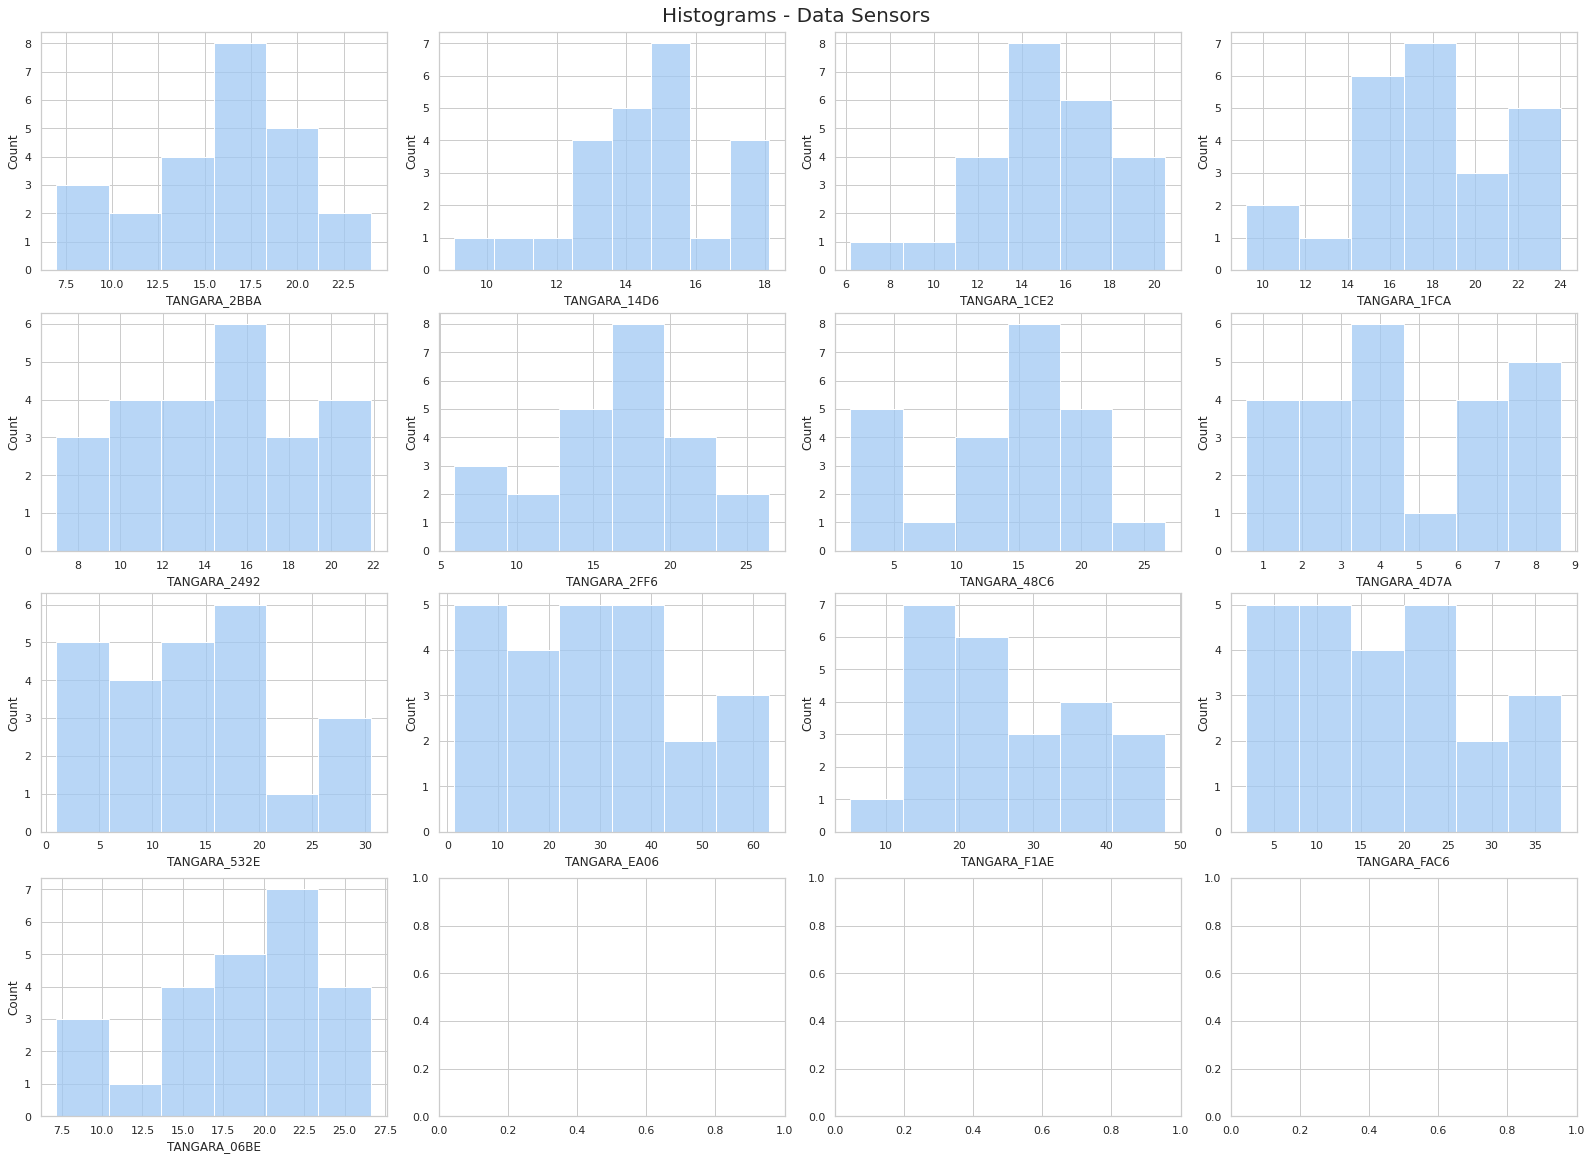

In [83]:
# Plot Histogramas
histplots(pm25_by_hour)

In [84]:
# Plot Boxplots
def boxplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Boxplots - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.boxplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]], orient="h", x=data_sensors[data_sensors.columns[k]])
            k += 1

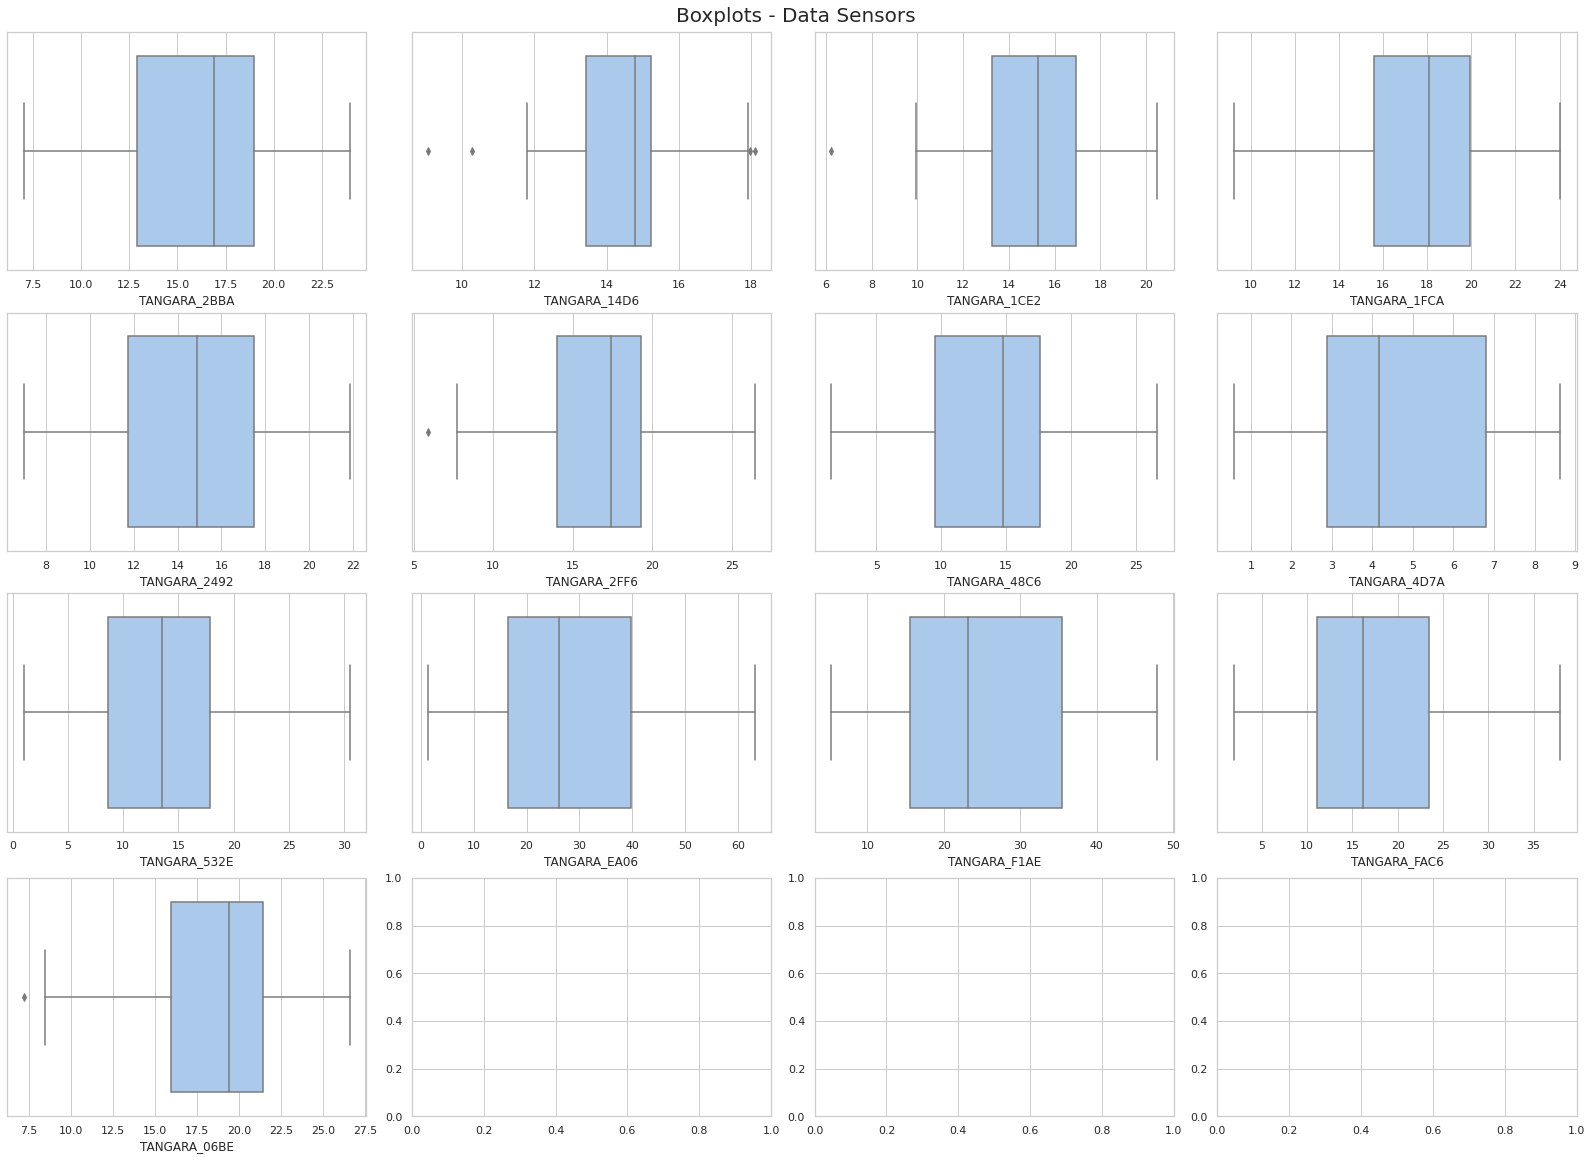

In [85]:
# Plot Boxplots
boxplots(pm25_by_hour)

In [86]:
# Plot Lineplots
def lineplots(data_sensors):
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)

    fig.suptitle('Timeline - Data Sensors', fontsize=20)

    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.lineplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

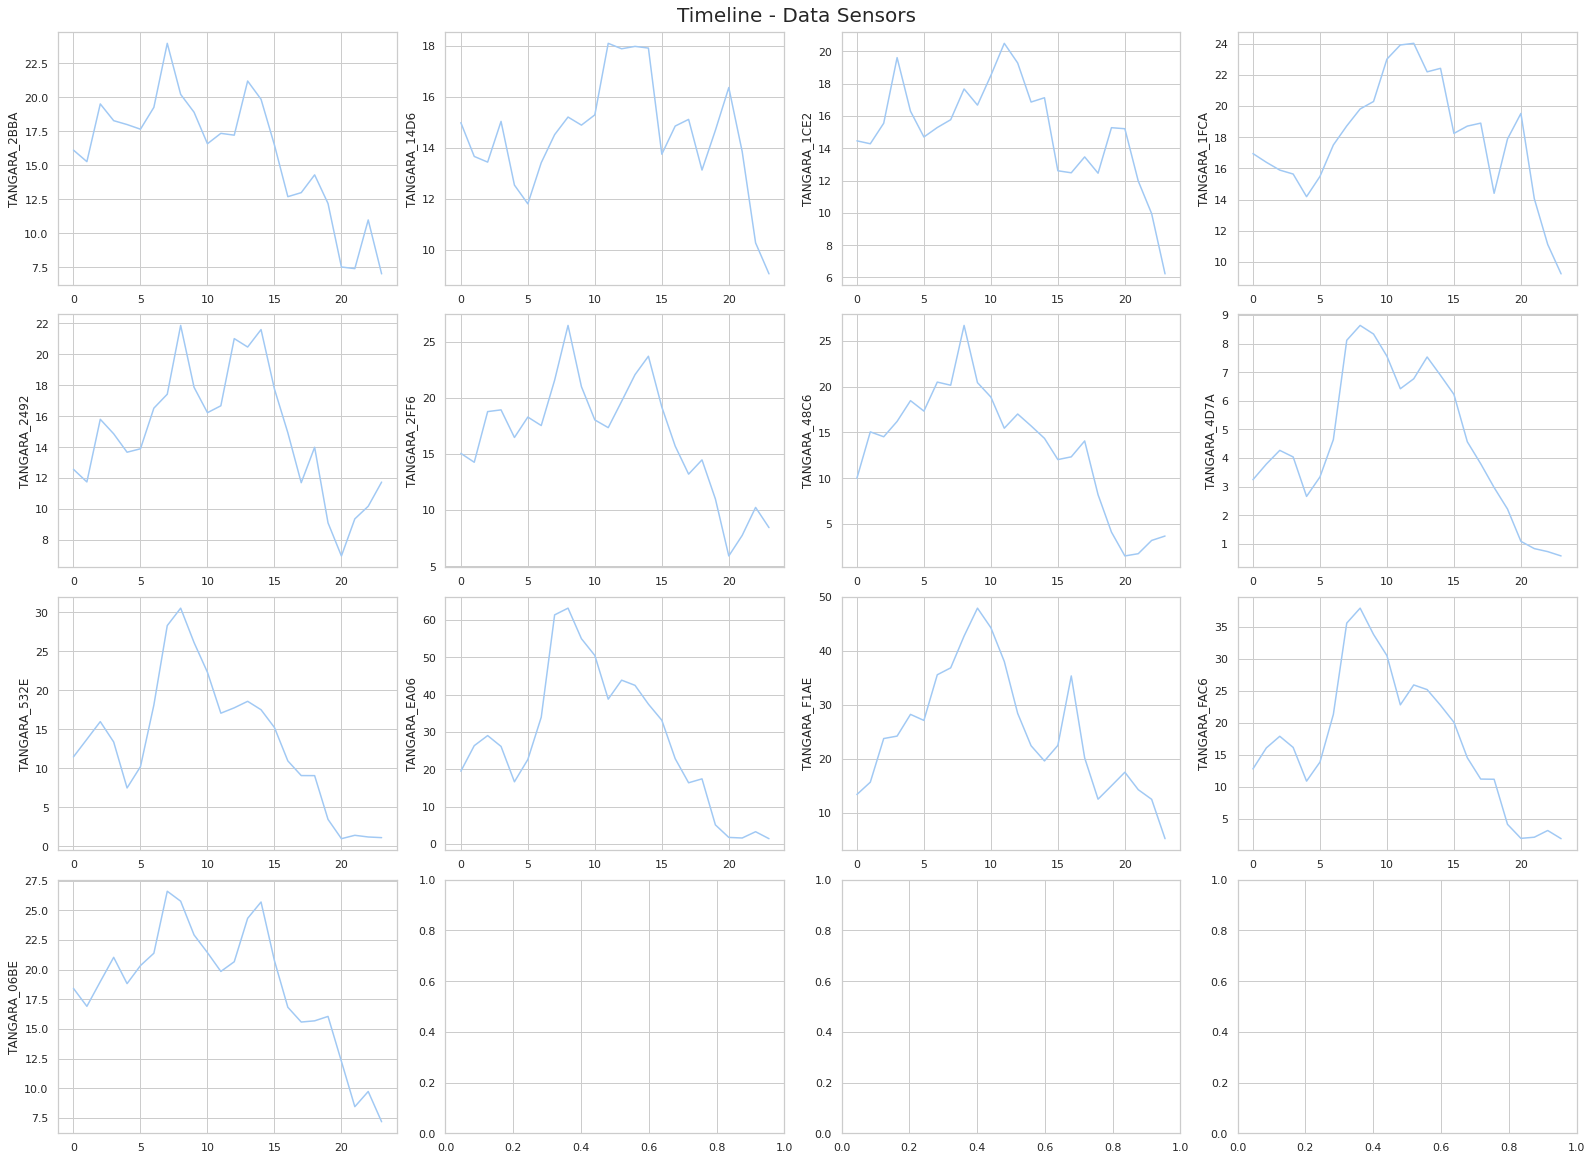

In [87]:
# Plot Lineplots
lineplots(pm25_by_hour)

In [88]:
# Save pm25_by_hour into Catalog
catalog.save('pm25_by_hour', pm25_by_hour)

2022-09-06 17:57:17,182 - kedro.io.data_catalog - INFO - Saving data to `pm25_by_hour` (CSVDataSet)...
